для одной переменной

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f_x(x):
    return 3*x**2

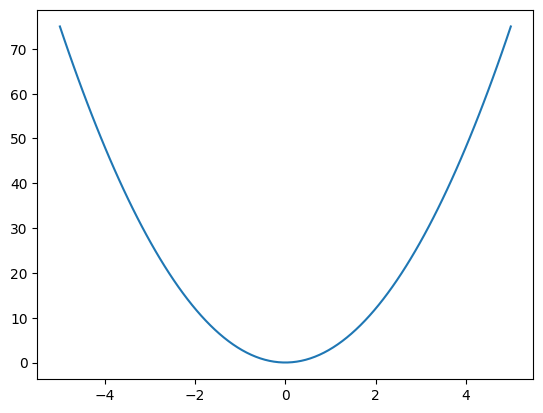

In [3]:
x = np.linspace(-5, 5, 100)
y = f_x(x)
plt.plot(x, y)
plt.show()

In [4]:
def df_x(x):
    return 6 * x
x0 = 5
lam = 0.1

In [5]:
res_x = []
x1 = x0-lam*df_x(x0)

In [6]:
while np.linalg.norm(x0-x1) > 0.00000001:
    res_x.append([x0, f_x(x0)])
    x0 = x1
    x1 = x0-lam*df_x(x0)

In [7]:
res_x

[[5, 75],
 [2.0, 12.0],
 [0.7999999999999998, 1.919999999999999],
 [0.3199999999999999, 0.3071999999999998],
 [0.12799999999999995, 0.04915199999999996],
 [0.05119999999999997, 0.00786431999999999],
 [0.020479999999999984, 0.001258291199999998],
 [0.008191999999999993, 0.00020132659199999963],
 [0.0032767999999999964, 3.221225471999993e-05],
 [0.0013107199999999983, 5.153960755199986e-06],
 [0.0005242879999999992, 8.246337208319973e-07],
 [0.0002097151999999996, 1.319413953331195e-07],
 [8.388607999999985e-05, 2.111062325329912e-08],
 [3.355443199999993e-05, 3.3776997205278583e-09],
 [1.3421772799999973e-05, 5.404319552844574e-10],
 [5.368709119999989e-06, 8.646911284551317e-11],
 [2.147483647999996e-06, 1.3835058055282112e-11],
 [8.589934591999983e-07, 2.2136092888451373e-12],
 [3.4359738367999934e-07, 3.54177486215222e-13],
 [1.374389534719997e-07, 5.666839779443549e-14],
 [5.4975581388799866e-08, 9.066943647109674e-15],
 [2.1990232555519943e-08, 1.4507109835375474e-15]]

In [8]:
res_x = np.array(res_x)

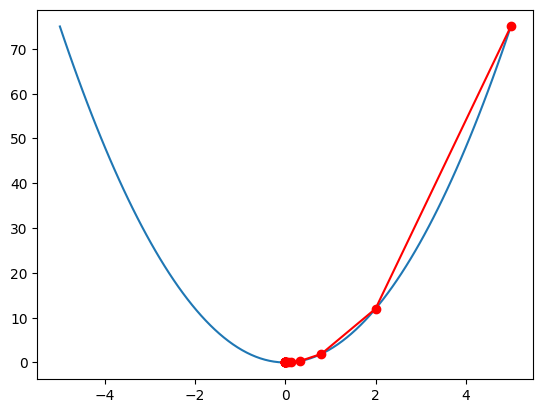

In [9]:
plt.plot(x, y)
plt.plot(res_x[:, 0], res_x[:, 1], 'o-', c = 'r')
plt.show()

In [14]:
from scipy.optimize import minimize_scalar

def f_x(x):
    return 3*x**2 #минимизация

def df_x(x):
    return 6*x #градиент


def steepest_descent(x0, learning_rate, tol=0.00000001, max_iter=13):
    x = x0
    res_x = []

    for _ in range(max_iter):
        res_x.append([x, f_x(x)])

        grad = df_x(x)
        if np.linalg.norm(grad) < tol:
            break

        x = x - learning_rate * grad

    return np.array(res_x) #наискорейший спуск


x0 = 1.0
learning_rate = 0.1
result = steepest_descent(x0, learning_rate) #запуск

for i in range(result.shape[0]):
    print("Итерация {}: x = {:.4f}, f(x) = {:.4f}".format(i, result[i, 0], result[i, 1])) #вывод

Итерация 0: x = 1.0000, f(x) = 3.0000
Итерация 1: x = 0.4000, f(x) = 0.4800
Итерация 2: x = 0.1600, f(x) = 0.0768
Итерация 3: x = 0.0640, f(x) = 0.0123
Итерация 4: x = 0.0256, f(x) = 0.0020
Итерация 5: x = 0.0102, f(x) = 0.0003
Итерация 6: x = 0.0041, f(x) = 0.0001
Итерация 7: x = 0.0016, f(x) = 0.0000
Итерация 8: x = 0.0007, f(x) = 0.0000
Итерация 9: x = 0.0003, f(x) = 0.0000
Итерация 10: x = 0.0001, f(x) = 0.0000
Итерация 11: x = 0.0000, f(x) = 0.0000
Итерация 12: x = 0.0000, f(x) = 0.0000


для двух переменных

In [10]:
def f_x(x, y):
    return 3*x**2 + 5*y**2

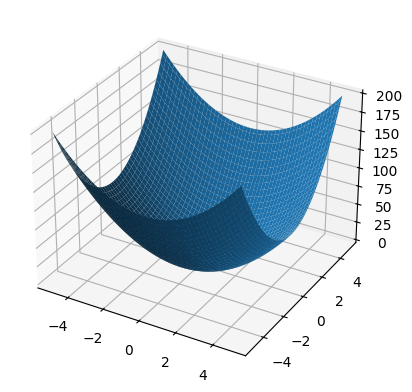

In [11]:
from mpl_toolkits.mplot3d import Axes3D
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = f_x(x,y)
fig, ax = plt.subplots(subplot_kw={'projection':'3d'})

ax.plot_surface(x,y,z)
plt.show()

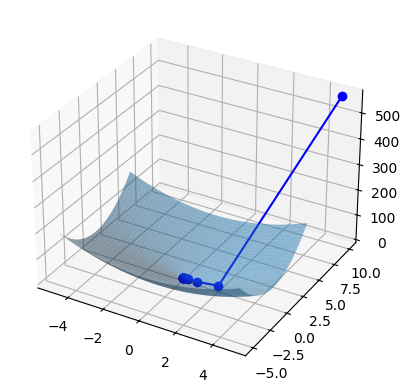

In [12]:
def df(x, y):
    return np.array([6 * x, 10*y])

x0 = np.array([5, 10])
lam = 0.1
res = []
x1 = x0 - lam*df(*x0)

while np.linalg.norm(x1 - x0) > 0.00000001:
    res.append([x0[0], x0[1]])
    x0 = x1
    x1 = x0 - lam*df(*x0)

res = np.array(res)

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = f_x(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, alpha=0.5)
ax.plot(res[:,0], res[:,1], f_x(res[:,0], res[:,1]), color='b', marker='o')
plt.show()

Итерация 0: x = 1.0000, f(x) = 3.0000
Итерация 1: x = 0.4000, f(x) = 0.4800
Итерация 2: x = 0.1600, f(x) = 0.0768
Итерация 3: x = 0.0640, f(x) = 0.0123
Итерация 4: x = 0.0256, f(x) = 0.0020
Итерация 5: x = 0.0102, f(x) = 0.0003
Итерация 6: x = 0.0041, f(x) = 0.0001
Итерация 7: x = 0.0016, f(x) = 0.0000
Итерация 8: x = 0.0007, f(x) = 0.0000
Итерация 9: x = 0.0003, f(x) = 0.0000
Итерация 10: x = 0.0001, f(x) = 0.0000
Итерация 11: x = 0.0000, f(x) = 0.0000
Итерация 12: x = 0.0000, f(x) = 0.0000


In [16]:
import numpy as np
def f_x(x, y):
    return 3*x**2 + 5*y**2

def df_x(x, y):
    return np.array([6*x, 10*y]) #градиент

def steepest_descent(x0, y0, learning_rate, tol=0.00000001, max_iter=13):
    x = x0
    y = y0
    res_xy = []

    for _ in range(max_iter):
        res_xy.append([x, y, f_x(x, y)])

        grad = df_x(x, y)
        if np.linalg.norm(grad) < tol:
            break

        x = x - learning_rate * grad[0]
        y = y - learning_rate * grad[1]
    return np.array(res_xy) #наискорейший спуск

x0 = 2.0
y0 = 2.0
learning_rate = 0.1

result = steepest_descent(x0, y0, learning_rate) #запуск

for i in range(result.shape[0]):
    print("Итерация {}: x = {:.4f}, y = {:.4f}, f(x, y) = {:.4f}".format(i, result[i, 0], result[i, 1], result[i, 2])) #выводы

Итерация 0: x = 2.0000, y = 2.0000, f(x, y) = 32.0000
Итерация 1: x = 0.8000, y = 0.0000, f(x, y) = 1.9200
Итерация 2: x = 0.3200, y = 0.0000, f(x, y) = 0.3072
Итерация 3: x = 0.1280, y = 0.0000, f(x, y) = 0.0492
Итерация 4: x = 0.0512, y = 0.0000, f(x, y) = 0.0079
Итерация 5: x = 0.0205, y = 0.0000, f(x, y) = 0.0013
Итерация 6: x = 0.0082, y = 0.0000, f(x, y) = 0.0002
Итерация 7: x = 0.0033, y = 0.0000, f(x, y) = 0.0000
Итерация 8: x = 0.0013, y = 0.0000, f(x, y) = 0.0000
Итерация 9: x = 0.0005, y = 0.0000, f(x, y) = 0.0000
Итерация 10: x = 0.0002, y = 0.0000, f(x, y) = 0.0000
Итерация 11: x = 0.0001, y = 0.0000, f(x, y) = 0.0000
Итерация 12: x = 0.0000, y = 0.0000, f(x, y) = 0.0000
